In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Decision tree and random forest

In [2]:
import os
os.chdir('C:/Users/ADMIN/Desktop/datasets')

In [3]:
data=pd.read_csv("bank.csv")

In [4]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
data['marital'] = le.fit_transform(data['marital'])
data['job'] = le.fit_transform(data['job'])
data['education'] = le.fit_transform(data['education'])
data['default'] = le.fit_transform(data['default'])
data['housing'] = le.fit_transform(data['housing'])
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact'])
data['month'] = le.fit_transform(data['month'])
data['poutcome'] = le.fit_transform(data['poutcome'])

In [8]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,yes
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,yes
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,yes
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,yes
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,no
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,no
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,no
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,no


In [9]:
data["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  int32 
 2   marital    11162 non-null  int32 
 3   education  11162 non-null  int32 
 4   default    11162 non-null  int32 
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int32 
 7   loan       11162 non-null  int32 
 8   contact    11162 non-null  int32 
 9   day        11162 non-null  int64 
 10  month      11162 non-null  int32 
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  int32 
 16  deposit    11162 non-null  object
dtypes: int32(9), int64(7), object(1)
memory usage: 1.1+ MB


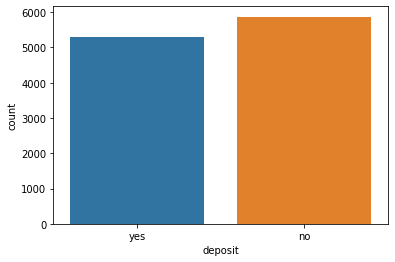

In [11]:
sns.countplot(data['deposit'], label ='Count')

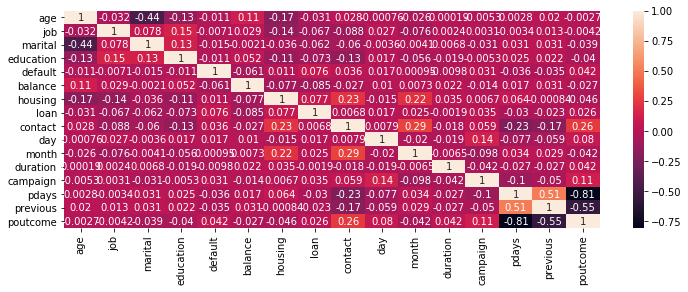

In [52]:
plt.figure(figsize=(12,4))
sns.heatmap(data.corr(), annot = True)

In [ ]:
sns.pairplot(data,diag_kws={'bw':0.1},hue='deposit')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = data.drop("deposit",axis=1)

In [16]:
Y= data['deposit']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(Y_test,predictions))
print('\n')
print(classification_report(Y_test,predictions))

[[1379  381]
 [ 367 1222]]


              precision    recall  f1-score   support

          no       0.79      0.78      0.79      1760
         yes       0.76      0.77      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



In [25]:
# Find feature importance
feature_importance = pd.DataFrame(dtree.feature_importances_,
                                  index = X_train.columns,
                                  columns = ['importance'])

In [26]:
feature_importance

,importance
age,0.065984
job,0.032218
marital,0.011594
education,0.017013
default,0.000863
balance,0.085066
housing,0.044475
loan,0.006776
contact,0.068292
day,0.069720


In [27]:
# Sorted Feature Importance
feature_importance = pd.DataFrame(
    dtree.feature_importances_,
    index = X_train.columns,
    columns = ['importance']).sort_values('importance',
    ascending = False)

In [28]:
feature_importance

,importance
duration,0.361183
month,0.099091
balance,0.085066
day,0.069720
contact,0.068292
age,0.065984
pdays,0.062800
housing,0.044475
poutcome,0.032743
job,0.032218


## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(n_estimators=200)

In [31]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
rfc_pred = rfc.predict(X_test)

In [33]:
print(confusion_matrix(Y_test,rfc_pred))
print('\n')
print(classification_report(Y_test,rfc_pred))

[[1405  355]
 [ 200 1389]]


              precision    recall  f1-score   support

          no       0.88      0.80      0.84      1760
         yes       0.80      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.84      0.84      0.83      3349
weighted avg       0.84      0.83      0.83      3349



## KNN

In [34]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,yes
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,yes
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,yes
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,yes
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,yes


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  int32 
 2   marital    11162 non-null  int32 
 3   education  11162 non-null  int32 
 4   default    11162 non-null  int32 
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int32 
 7   loan       11162 non-null  int32 
 8   contact    11162 non-null  int32 
 9   day        11162 non-null  int64 
 10  month      11162 non-null  int32 
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  int32 
 16  deposit    11162 non-null  object
dtypes: int32(9), int64(7), object(1)
memory usage: 1.1+ MB


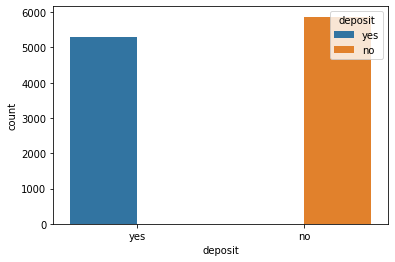

In [36]:
sns.countplot(data['deposit'],hue=data['deposit'])

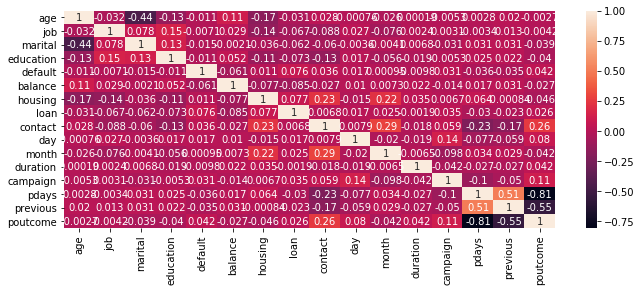

In [37]:
plt.figure(figsize=(11,4))
sns.heatmap(data.corr(),annot=True)

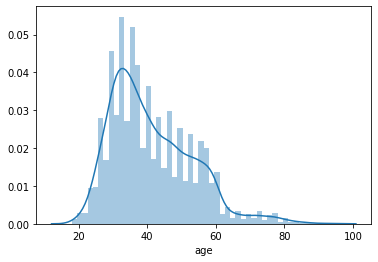

In [38]:
sns.distplot(data['age'])

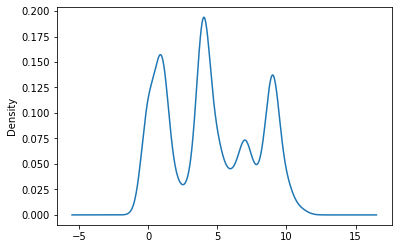

In [39]:
data['job'].plot(kind='kde')

In [40]:
Y=data['deposit']

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

In [42]:
from sklearn.model_selection import train_test_split
X=data[['age','job']]
# Y=data['Diabetes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
knn_predictions=knn_model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Confusion Matrix - \n',confusion_matrix(Y_test,knn_predictions))
print('\n')
print('Classification Report - \n',classification_report(Y_test,knn_predictions))
print('\n')
print('Accuracy Of Our Model -',accuracy_score(Y_test,knn_predictions))

Confusion Matrix - 
 [[1022  770]
 [ 734  823]]


Classification Report - 
               precision    recall  f1-score   support

           0       0.58      0.57      0.58      1792
           1       0.52      0.53      0.52      1557

    accuracy                           0.55      3349
   macro avg       0.55      0.55      0.55      3349
weighted avg       0.55      0.55      0.55      3349



Accuracy Of Our Model - 0.5509107196177964


In [47]:
knn_predictions.shape

(3349,)

In [48]:
Y_test.shape

(3349,)

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
probs =knn_model.predict_proba(X_test)
fpr,tpr,treshold=roc_curve(Y_test,probs[:,1])
roc_auc=roc_auc_score(Y_test,probs[:,1])
roc_auc

0.5670529908133775

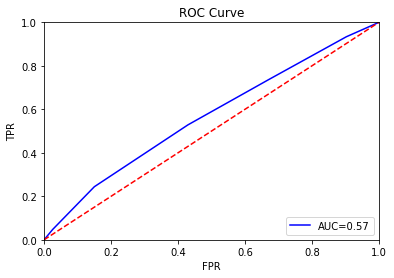

In [50]:
plt.title("ROC Curve")
plt.plot(fpr,tpr,"b",label="AUC=%0.2f" %roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()